In [1]:
240 * 65 / 1000

15.6

In [2]:
14 * 1000 / 240

58.333333333333336

In [3]:
import pandas as pd
from configurator import Config
from matplotlib.pyplot import gca, subplot, figure
from matplotlib.gridspec import GridSpec
from matplotlib.dates import DateFormatter
from common import root_from

In [4]:
config = Config.from_path('config.yaml')
root = root_from(config)

In [5]:
def lines(ax):
    ax.axhline(y=240 * 65 / 1000, color='grey', linestyle='dashed', label='65A')
    ax.axhline(y=7.5, color='grey', linestyle='dotted', label='7.5kW')

In [18]:
def plot_zappi_date(date, ax=None):
    ax = ax or gca()
    ax.set_title(date.strftime('myenergi: %a %d %b %Y'))
    path = root / date.strftime('zappi-%Y-%m-%d.csv')
    if path.exists():
        zappi_data = pd.read_csv(path, index_col='datetime', parse_dates=[0])
        zappi_data = zappi_data.reindex(
            index=pd.date_range(
                start=zappi_data.index.min(),
                end=zappi_data.index.max(),
                freq='1 min'
            ),
        )
        ax.plot(zappi_data['gep']/(60*1000), label='gep (kw)')
        ax.plot(zappi_data['gen']/(60*1000), label='gen (kw)')
        ax.plot(zappi_data['imp_kw'], label='imp (kw)')
        ax.plot(zappi_data['h1b_kw'], label='h1b (kw)')
    lines(ax)
    ax.legend()
    ax.xaxis.set_major_formatter(DateFormatter("%H:%M"))

In [19]:
def plot_tesla_date(date, ax=None, abs=True):
    date = pd.Timestamp(date)
    tesla_data = pd.read_csv(root / date.strftime('tesla-%Y-%m-%d.csv'), index_col='timestamp', parse_dates=[0])
    ax = ax or gca()
    ax.set_title(date.strftime('Tesla: %a %d %b %Y'))
    lines(ax)
    ax.legend()
    tesla_kw = (tesla_data / 1000)
    if abs:
        tesla_kw = tesla_kw.abs().rename(columns=lambda name: f'abs({name})')
    for col in tesla_kw:
        ax.plot(tesla_kw[col], label=col)
    ax.xaxis.set_major_formatter(DateFormatter("%H:%M"))
    ax.legend()

In [20]:
def make_gs(rows: int):
    fig = figure(figsize=(16, rows*32/5), dpi=70)
    fig.set_facecolor('white')
    gs = GridSpec(rows, 2)
    gs.update(hspace=0.3)
    return gs

def plot_date(dt, gs=None, i=0, *, tesla_day_offset=0, tesla_abs=True):
    if isinstance(dt, str):
        dt = pd.Timestamp(dt)
    if gs is None:
        gs = make_gs(rows=1)
    ax = subplot(gs[i, 0])
    plot_zappi_date(dt, ax)
    ax = subplot(gs[i, 1], sharey=ax, sharex=ax)
    plot_tesla_date(dt + pd.Timedelta(days=tesla_day_offset), ax, abs=tesla_abs)

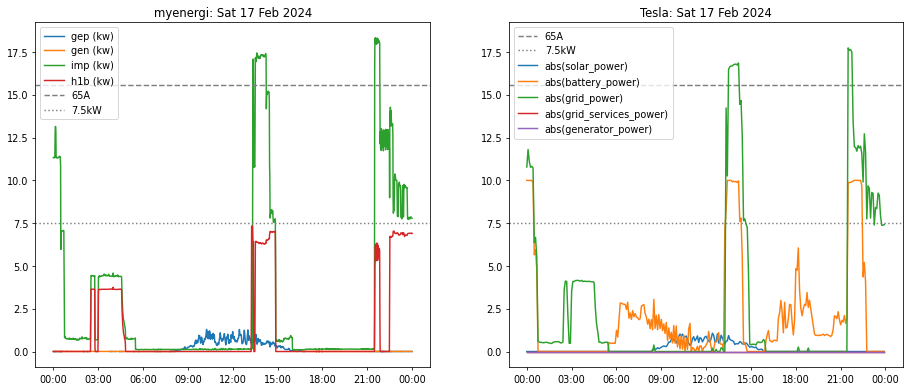

In [21]:
plot_date('2024-02-17')

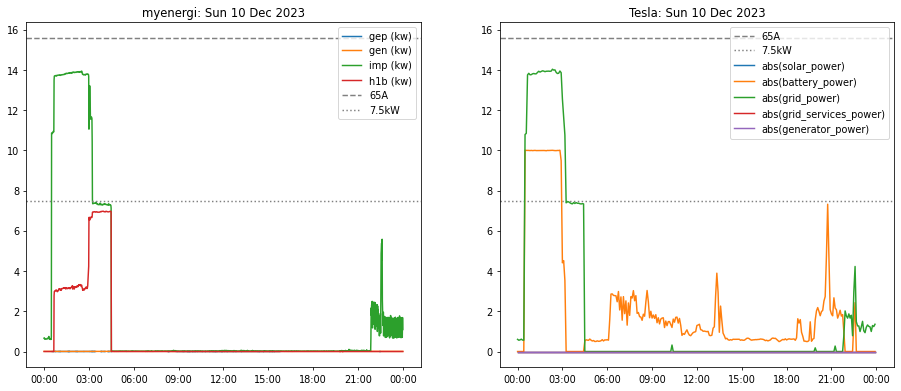

In [22]:
plot_date('2023-12-10')

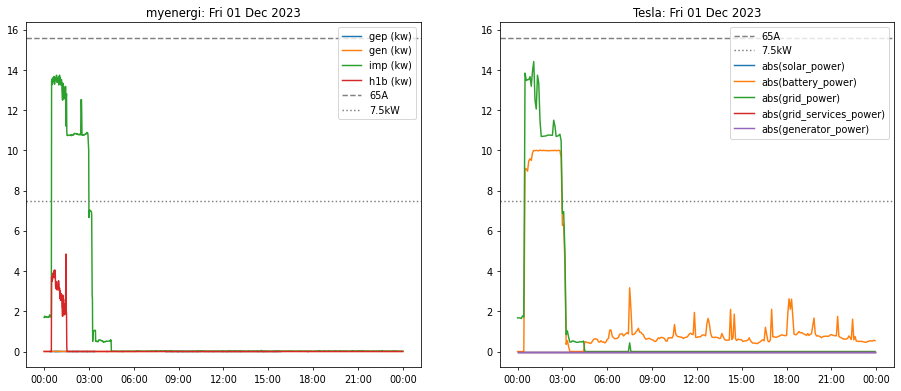

In [23]:
plot_date('2023-12-01')

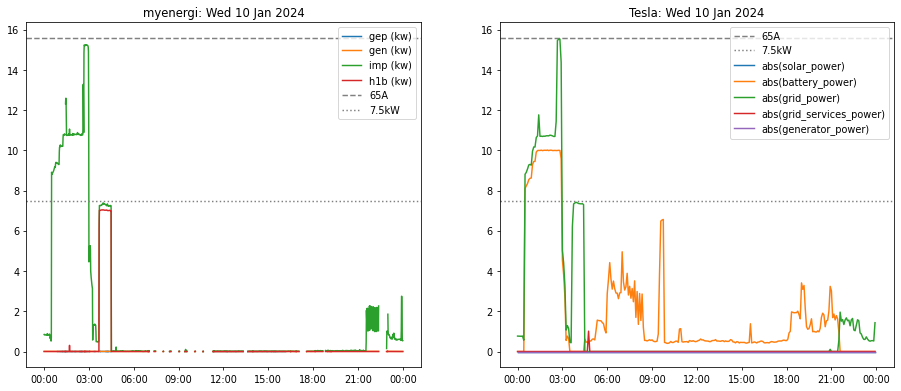

In [24]:
plot_date('2024-01-10')

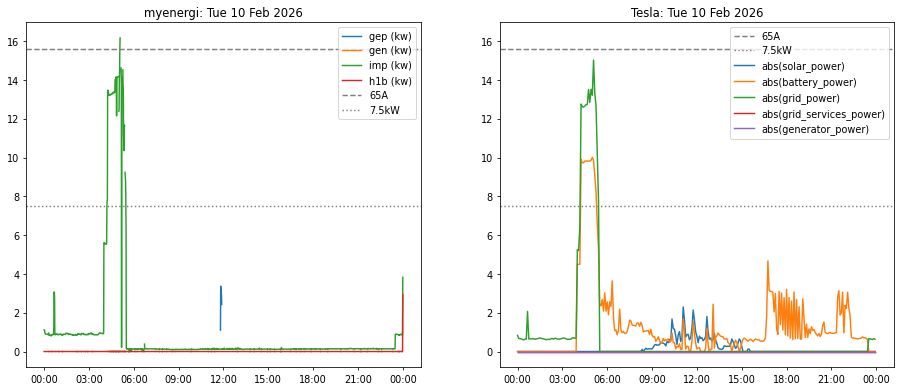

In [25]:
plot_date('2026-02-10')

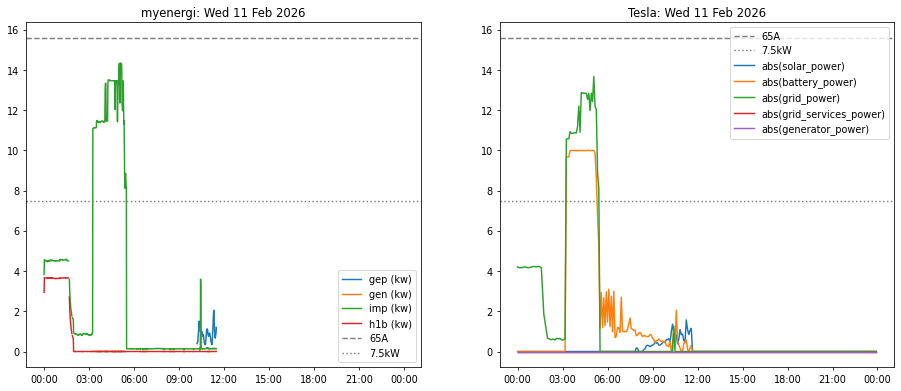

In [26]:
plot_date('2026-02-11')